<a href="https://colab.research.google.com/github/maritnorli/IFCB_CNN_Classify/blob/main/Train_test_IFCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this course
torch.__version__

'2.1.0+cu121'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "IFCB_test_train"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)



data/IFCB_test_train directory already exists... skipping download


In [23]:
# Download data from PUBLIC repository
with open(data_path / "IFCB_test_train.zip", "wb") as f: #data path= image_path  SLASH the file we are trying to open
  request = requests.get("https://github.com/maritnorli/IFCB_CNN_Classify/raw/main/data/IFCB_test_train.zip")
  print("Downloading IFCB data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "IFCB_test_train.zip", "r") as zip_ref:
  print("Unzipping IFCB_test_train data...")
  zip_ref.extractall(image_path)

Done downloading


## 2. Becoming one with the data (data prep and data explore)


In [27]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [28]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/IFCB_test_train'.
There are 0 directories and 0 images in 'data/IFCB_test_train/.ipynb_checkpoints'.
There are 2 directories and 0 images in 'data/IFCB_test_train/IFCB_test_train'.
There are 3 directories and 0 images in 'data/IFCB_test_train/IFCB_test_train/Train'.
There are 0 directories and 70 images in 'data/IFCB_test_train/IFCB_test_train/Train/Guinardia_delicatula_095'.
There are 0 directories and 70 images in 'data/IFCB_test_train/IFCB_test_train/Train/Chaetoceros_decipiens_118'.
There are 0 directories and 70 images in 'data/IFCB_test_train/IFCB_test_train/Train/Tripos_muelleri_008'.
There are 3 directories and 0 images in 'data/IFCB_test_train/IFCB_test_train/Test'.
There are 0 directories and 14 images in 'data/IFCB_test_train/IFCB_test_train/Test/Guinardia_delicatula_095'.
There are 0 directories and 14 images in 'data/IFCB_test_train/IFCB_test_train/Test/Chaetoceros_decipiens_118'.
There are 0 directories and 14 images in 'data/

In [29]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(PosixPath('data/IFCB_test_train/train'),
 PosixPath('data/IFCB_test_train/test'))

### 2.1 Visualizing and image
Let's write some code to:

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

In [32]:
image_path

PosixPath('data/IFCB_test_train')

Random image path: data/IFCB_test_train/IFCB_test_train/Train/Tripos_muelleri_008/D20230524T071930_IFCB139_00008.png
Image class: Tripos_muelleri_008
Image height: 628
Image width: 608


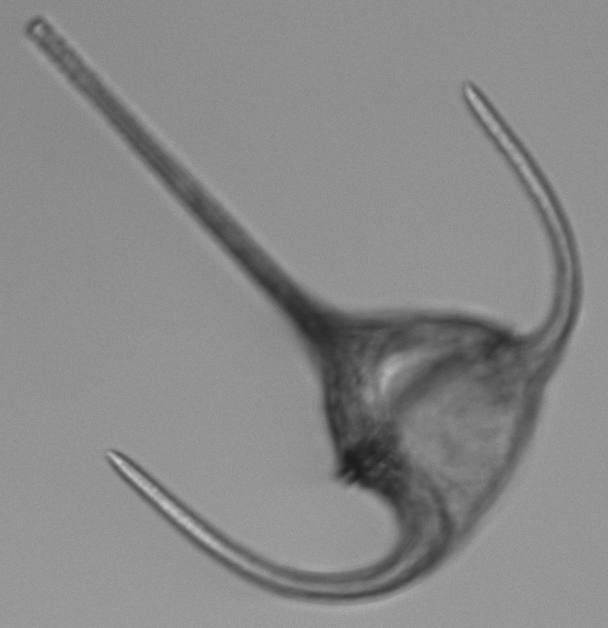

In [37]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths to folders in image_path + */*/*/*
image_path_list = list(image_path.glob("*/*/*/*.png")) #glob together all of the files that
#image_path_list #use this to check there are images in paths

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img
